# 비지도 학습

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

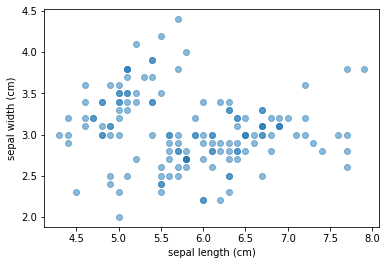

In [1]:
#sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
print(samples)

#sepal length와 width 두 가지 feature만을 사용하도록 하겠음
#데이터로부터 두 feature만을 뽑아내어 산점도를 그려봄(x축-length, y축-width)
from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, alpha=0.5)    #alpha - 색상의 투명도 지정(0-완전투명, 1-불투명)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

#Iris Dataset은 원래 label이 제공되지만, label이 없다고 가정하고 K-Mean 알고리즘으로
#위 데이터를 그룹화 함. K-Means 클러스터링 알고리즘 사용

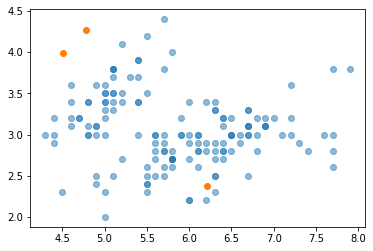

In [2]:
#STEP 1:Place K Random Centroids : 제일 먼저 K개의 centroids(중심값)를 임의로 지정
#3가지 종이 존재하므로 K 는 3으로 설정
import numpy as np
k = 3

#랜덤으로 x, y좌표 3개를 생성
#np.random.uniform은 주어진 최소, 최대값 사이에서 k개 만큼 실수 난수를 생성
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))   #[(,), (,), (,)]

#centroids는 임의로 생성한 (x,y) 좌표 3개를 갖게 됨
plt.scatter(x, y, alpha=0.5)    #데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y)    #centroids는 주황색으로 표시
plt.show()

In [9]:
#STEP 2: Assign Datas to Nerares Centroid
#centroids에 가까운 데이터들을 할당. '가깝다' 라는 것을 정량적으로 계산하기 위해
#각 데이터를 벡터로 간주하여 유클리드 거리를 계산
#두 데이터 포인트 사이의 거리를 계산하는 disatnce()함수를 작성
def distance(a, b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5

#각 데이터들 별로 3개의 centroids와의 거리를 측정. labels란 배열을 생성하고,
#가장 가까운 centroids의 index를 저장
#각 데이터 포인트를 그룹화 할 labels를 생성합니다(0, 1, 또는 2)
labels = np.zeros(len(samples))    #samples는 iris data
sepal_length_width = np.array(list(zip(x, y)))

#각 데이터를 순회하면서 centriods와의 거리를 측정합니다
for i in range(len(samples)):
    distances = np.zeros(k)    #초기 거리는 모두 0으로 초기화, 3개 요소 1차원 배열(k=3)
    for j in range(k):    #3번 반복(각각의 x,y에 대해 세 중심과의 거리를 구해 disatnce[0][1][2]에 집어넣음)
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)    #np.argmin은 가장 작은 값의 index를 반환(세 중심중 어디에 가까운지)
    labels[i] = cluster    #label에는 각각 x,y에 대해 세 중심중 어디에 속하는지에 대한 정보가 있음

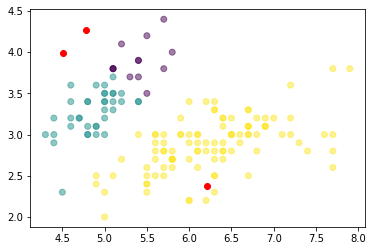

In [10]:
#생성된 labels에는 0, 1 또는 2가 저장되어 각 데이터(iris data)가 어느 centroid그룹에
#속해 있는지를 나타냄. 시각화를 통해 확인.
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')    #centroid는 빨간색으로
plt.show()

#데이터들이 가까운 centroid에 잘 할당되어 있지만, 처음 centroid를 선택했을 때
#랜덤으로 선택했으므로 최적화가 필요

In [11]:
#STEP 3: UPdate Centroids - centroids를 새롭게 지정함으로써 데이터를 더 잘 그룹화
#할 수 있도록 만들어야 함. 기존에 지정한 centroids를 복사해두어 centroids_old에 저장
from copy import deepcopy
centroids_old = deepcopy(centroids)

#각 그룹별로 데이터의 평균을 계산. 즉, 각 데이터들의 평균 x좌표와 평균 y좌표를
#계산하여 하나의 좌표를 계산. 이렇게 계산된 좌표는 새로운 centroids로 지정
for i in range(k):
    #각 그룹에 속한 데이터들만 골라 points에 저장. labels에 섞인 값을 sepal_length_width
    #에 구분하여 저장 points는 각각 그룹의 x,y 좌표를 가진 list
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    #points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정
    centroids[i] = np.mean(points, axis=0)
    
#data 및 type 확인
print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

[array([5.4       , 3.89230769]), array([4.86756757, 3.26486486]), array([6.262, 2.872])]
<class 'list'>
[(4.774567814795063, 4.275361695455167), (4.507788178176292, 3.988246687692258), (6.2132267869400195, 2.381137928257056)]
<class 'list'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


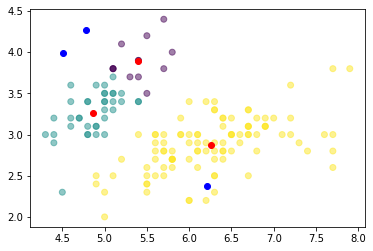

In [12]:
centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))

#기존 centroids_old와 centroids 위치 비교
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.show()
#Centroids가 전체적으로 중앙으로 이동하여 데이터의 중심 지점에 위치한 것을 확인할 수 있음

In [13]:
#STEP 4: Repeat Step 2 ~ 3 Until Convergence(집중점, 집합점)
#필요한 모든 building blocks를 구현. 2~3단계를 반복하여 최적의 centroids를 찾는것이 목표
#그런데 언제까지 찾아야 할까?
#error라는 배열 생성. error의 각 index는 centroids_old와 새롭게 지정된 centroids의
#거리를 저장. 이 거리가 모두 0이 되면 최적해에 수렴한것으로 판단하여
#반복을 종료
centroids_old = np.zeros(centroids.shape)    #제일 처음 centroids_old는 0으로 초기화
labels = np.zeros(len(samples))
error = np.zeros(k)    #error도 초기화

for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])

In [14]:
while error.all() != 0:    #열의 데이터 중 조건과 맞는 데이터가 있으면 True, 전혀 없으면 False
    #STEP 2 : 가까운 centroids에 데이터를 할당합니다.
    for i in range(len(samples)):
        distances = np.zeros(k)    #초기 거리는 모두 0으로 초기화 해줍니다
        for j in range(k):
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)    #np.argmin은 가장 작은 값의 index를 반환
        labels[i] = cluster
    
    #STEP 3: centroids를 업데이트
    centroids_old = deepcopy(centroids)
    for i in range(k):
        #각 그룹에 속한 데이터들만 골라 points에 저장합니다
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        #points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
        centroids[i] = np.mean(points, axis=0)
    #새롭게 centroids를 업데이트 했으니 error를 다시 계산합니다
    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])

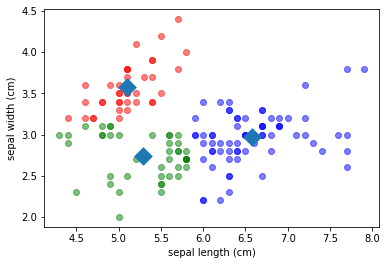

In [15]:
#최적의 centroids를 찾았으니 이를 시각화하여 확인
#직관적으로 알아보기 위해 색을 r, g, b로 설정. centorids는 다이아몬드 형태로 마킹
colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)    #alpha : 색상 투명도
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## 비지도학습 - scikit-learn 라이브러리 활용

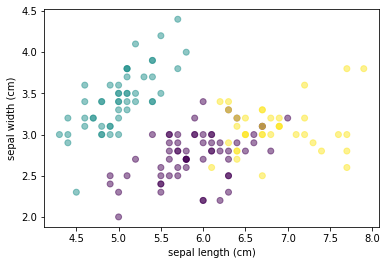

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
#sklearn 라이브러리의 cluster 모듈에는 K-Means를 구현할 수 있는 KMeans를 제공
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data    #이건 위에거와 다르게 모든 데이터를 받는다
#samples = iris.data[:, 0:2]#위에거처럼 두개(length/widht)만 받도록 슬라이싱(그래도 거의 유사하다)

#3개의 그룹으로 나누는 K-Means 모델을 생성
model = KMeans(n_clusters = 3)    #k를 지정해 주어야 함

#.fit() 메서드를 통해 K-Mean 클러스터링을 수행
model.fit(samples)

#K-Means를 수행한 다음, .predict()메서드를 통해 unlabeled 데이터를 그룹에 할당
labels = model.predict(samples)

#클러스터링 결과를 시각화
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

#비지도 학습 - 검증

In [17]:
#Evaluation : Iris 데이터를 3가지 서로 다른 그룹으로 클러스터링 하는 것을 Python과 sklearn을
#활용하여 구현. 실제로 얼마나 많은 데이터를 올바르게 분류한 것일지 확인
#Iris 데이터셋은 label이 포함되어 있으며, target이라는 내장 속성을 통해 접근 가능
target = iris.target

#문자열 배열을 생성시킴
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
    if target[i] == 0:
        species[i] = 'setosa'
    elif target[i] == 1:
        species[i] = 'versicolor'
    elif target[i] == 2:
        species[i] = 'virginica'
        
#다음으로 cross-tabulation을 통해 결과를 분석
#Pandas 라이브러리를 활용하면 이를 쉽게 구현할 수 잇음
import pandas as pd

#labels : 비지도 학습 데이터
#species : 원 데이터
df = pd.DataFrame({'labels' : labels, 'species' : species})
ct = pd.crosstab(df['labels'], df['species'])    #빈도표를 만들어주는 pandas 함수
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


## 비지도 학습 - Number of Clusters

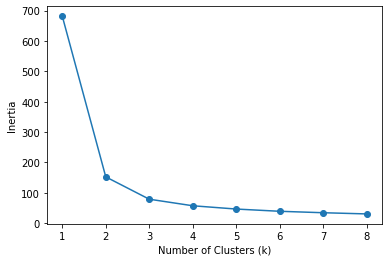

In [18]:
num_clusters = list(range(1, 9))    #K는 1 ~ 8 사이의 정수
inertias = []

#각 K별로 모델을 생성하여 inertia를 측정
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)
    
#K에 따른 inertia의 변화를 시각화
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()